# Numpy et matplotlib

Dans cette section, nous allons découvrir deux modules indispensables à la programmation scientifique: [Numpy](http://www.numpy.org/) et [Matplotlib](http://matplotlib.org/).

Cette section est adaptée d'un cours de Slim Essid et Alexandre Gramfort, qui était lui-même adapté du travail de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/. Elle s'inspire aussi de la leçon du [Numpy avancé](https://paris-swc.github.io/advanced-numpy-lesson/) de Softwate Carpentry.

## Introduction

 

* `numpy` est un module utilisé dans presque tous les projets de calcul numérique sous Python
   * Il fournit des structures de données performantes pour la manipulation de vecteurs, matrices et tenseurs plus généraux
   * `numpy` est écrit en C et en Fortran d'où ses performances élevées lorsque les calculs sont vectorisés (formulés comme des opérations sur des vecteurs/matrices)

 * `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D
   * syntaxe très proche de celle de Matlab
   * supporte texte et étiquettes en $\LaTeX$
   * sortie de qualité dans divers formats (PNG, PDF, SV, EPS...)
   * interface graphique interactive pour explorer les figures

Pour utiliser `numpy` et `matplotlib` il faut commencer par les importer :

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

On peut aussi faire cela (mais ce n'est pas conseillé):

In [2]:
from numpy import *
from matplotlib.pyplot import *

## *Arrays* `numpy`

Dans la terminologie `numpy`, vecteurs, matrices et autres tenseurs sont appelés *arrays*.


## Création d'*arrays* `numpy` 

Plusieurs possibilités:

 * à partir de listes ou tuples
 * en utilisant des fonctions dédiées, telles que `arange`, `linspace`, etc.
 * par chargement à partir de fichiers

### A partir de listes

Au moyen de la fonction `numpy.array` :


In [4]:
# un vecteur: l'argument de la fonction est une liste Python
v = np.array([1, 3, 2, 4])
print v
print type(v)

[1 3 2 4]
<type 'numpy.ndarray'>


On peut alors visualiser ces données :

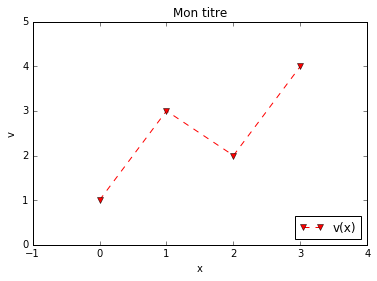

In [9]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

plt.figure()
plt.plot(x,v, 'rv--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Mon titre')
plt.xlim([-1, 4])
plt.ylim([0, 5])
# plt.show()
plt.savefig('toto.png')

On peut omettre `show()`, lorsque la méthode `ion()` a été appelée ; c'est le cas dans Spyder et pylab

Pour définir une matrice (array de dimension 2 pour numpy):


In [336]:
# une matrice: l'argument est une liste emboitée
M = np.array([[1, 2], [3, 4]])
print M

[[1 2]
 [3 4]]


In [337]:
M[0, 0]

1

Les objets `v` et `M` sont tous deux du type `ndarray` (fourni par `numpy`)

In [338]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v` et `M` ne diffèrent que par leur taille, que l'on peut obtenir via la propriété `shape` :

In [339]:
v.shape

(4,)

In [340]:
M.shape

(2, 2)

Pour obtenir le nombre d'éléments d'un *array* :

In [341]:
v.size

4

In [342]:
M.size

4

Les *arrays* ont un type qu'on obtient via `dtype`:

In [344]:
print(M)
print(M.dtype)

[[1 2]
 [3 4]]
int64


Les types doivent être respectés lors d'assignations à des *arrays*

In [10]:
M[0, 0] = "hello"

NameError: name 'M' is not defined

### Attention !

In [11]:
a = np.array([1, 2, 3])
a[0] = 3.2
print(a)
a.dtype

[3 2 3]


dtype('int64')

On peut définir le type de manière explicite en utilisant le mot clé `dtype` en argument: 

In [12]:
a = np.array([1, 2, 3], dtype=np.int64)
b = np.array([2, 2, 3], dtype=np.int64)
b = b.astype(float)
print a / b

[ 0.5  1.   1. ]


In [349]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

 * Autres types possibles avec `dtype` : `int`, `float`, `complex`, `bool`, `object`, etc.

 * On peut aussi spécifier la précision en bits: `int64`, `int16`, `float128`, `complex128`.

### Utilisation de fonction de génération d'*arrays*

#### arange

In [350]:
# create a range
x = np.arange(0, 10, 2) # arguments: start, stop, step
x

array([0, 2, 4, 6, 8])

In [351]:
x = np.arange(-1, 1, 0.1)
x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [352]:
# avec linspace, le début et la fin SONT inclus
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [353]:
np.linspace(0, 10, 11)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

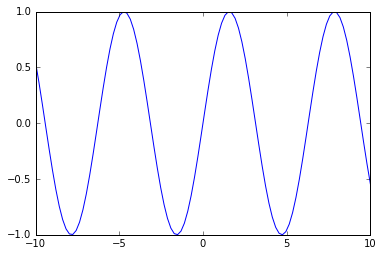

In [354]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.sin(xx))

In [19]:
print(np.logspace(0, 9, 10, base=np.e))

[  1.00000000e+00   2.71828183e+00   7.38905610e+00   2.00855369e+01
   5.45981500e+01   1.48413159e+02   4.03428793e+02   1.09663316e+03
   2.98095799e+03   8.10308393e+03]


In [21]:
np.e ** np.linspace(0, 9, 10) 

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

#### mgrid

In [22]:
x, y = np.mgrid[0:5, 0:5] 

In [23]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [358]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

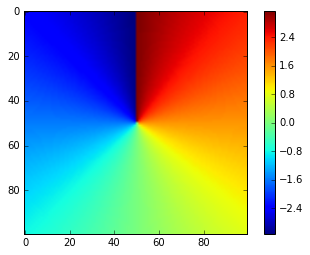

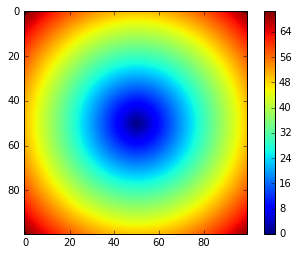

In [359]:
xx, yy = np.mgrid[-50:50, -50:50] 
plt.imshow(np.angle(xx + 1j*yy))
plt.axis('on')
plt.colorbar()
plt.figure()
plt.imshow(np.abs(xx + 1j*yy))
plt.axis('on')
plt.colorbar()

#### Données aléatoires

Le module numpy.random peut être utilisé pour les données aléatoires.

Tirage uniforme dans [0, 1]

In [24]:
np.random.rand(5, 5)  

array([[ 0.84576873,  0.40740916,  0.24940788,  0.44222898,  0.58001942],
       [ 0.14208503,  0.43736917,  0.91722944,  0.2136473 ,  0.04659376],
       [ 0.60447543,  0.30925252,  0.19108643,  0.60059833,  0.19645719],
       [ 0.45049843,  0.86158323,  0.00532348,  0.64752382,  0.79944437],
       [ 0.61476775,  0.09455754,  0.8572489 ,  0.33579947,  0.2678818 ]])

Tirage suivant une loi normale standard

In [25]:
np.random.randn(5, 5)

array([[-1.2003448 , -0.11359557, -0.70469126, -0.09326922, -0.32797577],
       [ 1.22585428, -1.03841869,  1.33798938,  0.55357012, -0.24757563],
       [-0.87417616,  0.48053503,  0.42493922, -0.92855723, -0.68364093],
       [-0.44906923,  0.35524127, -0.18808866, -0.19594251,  0.4875173 ],
       [-0.29056086,  1.9006896 , -1.38274106, -1.62162176, -1.09687425]])

Affichage de l'histogramme des tirages

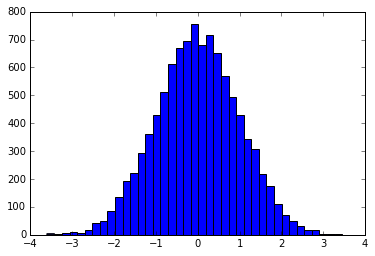

In [365]:
a = np.random.randn(10000)
hh = plt.hist(a, 40)

#### diag

In [26]:
# une matrice diagonale
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [27]:
# diagonale avec décalage par rapport à la diagonale principale
np.diag([1, 2, 3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros et ones

In [369]:
np.zeros((3,), dtype=int)  

array([0, 0, 0])

In [370]:
np.zeros((3, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [371]:
np.ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [287]:
print(np.zeros((3,), dtype=int))
print(np.zeros((1, 3), dtype=int))
print(np.zeros((3, 1), dtype=int))

[0 0 0]
[[0 0 0]]
[[0]
 [0]
 [0]]


##  Fichiers d'E/S

### Fichiers séparés par des virgules (CSV)

Un format fichier classique est le format CSV (comma-separated values), ou bien TSV (tab-separated values). Pour lire de tels fichiers, on peut utiliser `numpy.genfromtxt`. Par exemple:

In [28]:
!cat exo_numpy/2_numpy_data.csv

1, 2, 3, 4
5, 6, 7, 8
9, 10, 11, 12



In [29]:
data = np.genfromtxt('exo_numpy/2_numpy_data.csv', delimiter=',')
data

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.]])

In [290]:
data.shape

(3, 4)

On peut aussi utiliser une fonction très pratique de [pandas](http://pandas.pydata.org): `pandas.read_csv`. Les données sont alors un [pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe) que l'on peut convertir en numpy array.

In [30]:
import pandas as pd
df = pd.read_csv('exo_numpy/2_numpy_data.csv')

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
dn = np.array(df)
type(dn)

numpy.ndarray

In [33]:
dn

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

A l'aide de `numpy.savetxt` on peut enregistrer un *array* `numpy` dans un fichier txt:

In [295]:
M = random.rand(3,3)
M

array([[ 0.02787951,  0.43695794,  0.03234578],
       [ 0.31330511,  0.92411189,  0.84152562],
       [ 0.03892719,  0.75878445,  0.91813489]])

In [296]:
np.savetxt("exo_numpy/random-matrix.txt", M)

In [297]:
!cat random-matrix.txt
#!type random-matrix.txt

2.787950653980120208e-02 4.369579398047497287e-01 3.234578317038083739e-02
3.133051071329422399e-01 9.241118876997285181e-01 8.415256167471137916e-01
3.892718610560597092e-02 7.587844526441323012e-01 9.181348859522883155e-01


In [298]:
np.savetxt("exo_numpy/random-matrix.csv", M, fmt='%.5f', delimiter=',') # fmt spécifie le format

!cat random-matrix.csv
#!type random-matrix.csv

0.02788,0.43696,0.03235
0.31331,0.92411,0.84153
0.03893,0.75878,0.91813


Ici aussi, on peut utiliser une fonction très pratique de pandas: `to_csv`, mais il faudrait convertir le tableau en pandas DataFrame.

In [299]:
df = pd.DataFrame(M)

In [300]:
df

,0,1,2
0,0.027880,0.436958,0.032346
1,0.313305,0.924112,0.841526
2,0.038927,0.758784,0.918135


In [301]:
df.to_csv("exo_numpy/random_matrix_pd.csv", index=False, header=False, float_format='%.5f')

In [302]:
!cat exo_numpy/random_matrix_pd.csv

0.02788,0.43696,0.03235
0.31331,0.92411,0.84153
0.03893,0.75878,0.91813


## Manipulation d'*arrays*

### Indexation

In [35]:
v = np.arange(10)
print(v)
M = np.random.rand(3, 4)
print(M)

[0 1 2 3 4 5 6 7 8 9]
[[ 0.14917447  0.4084674   0.98631663  0.26927651]
 [ 0.76640783  0.32892942  0.97502491  0.40600746]
 [ 0.15112728  0.3187965   0.00324059  0.67934562]]


v est un vecteur, il n'a qu'une dimension -> un seul indice

In [36]:
v[0]

0

M est une matrice, ou un array à 2 dimensions -> deux indices 

In [37]:
M[1, 1]

0.32892942458770957

Contenu complet :

In [389]:
M

array([[ 0.4987961 ,  0.22098541,  0.92046706,  0.95683718],
       [ 0.86976011,  0.3262844 ,  0.05344399,  0.90116654],
       [ 0.17175245,  0.09373453,  0.8634008 ,  0.34695515]])

La deuxième ligne :

In [393]:
M[1]

array([ 0.86976011,  0.3262844 ,  0.05344399,  0.90116654])

On peut aussi utiliser `:` 

In [394]:
M[1, :] # 2 ème ligne (indice 1)

array([ 0.86976011,  0.3262844 ,  0.05344399,  0.90116654])

In [395]:
M[:, 1] # 2 ème colonne (indice 1)

array([ 0.22098541,  0.3262844 ,  0.09373453])

In [396]:
print(M.shape)
print(M[1, :].shape, M[:, 1].shape)

(3, 4)
((4,), (3,))


On peut assigner des nouvelles valeurs à certaines cellules :

In [397]:
M[0, 0] = 1

In [398]:
M

array([[ 1.        ,  0.22098541,  0.92046706,  0.95683718],
       [ 0.86976011,  0.3262844 ,  0.05344399,  0.90116654],
       [ 0.17175245,  0.09373453,  0.8634008 ,  0.34695515]])

In [399]:
# on peut aussi assigner des lignes ou des colonnes
M[1, :] = -1
# M[1,:] = [1, 2, 3]

In [400]:
M

array([[ 1.        ,  0.22098541,  0.92046706,  0.95683718],
       [-1.        , -1.        , -1.        , -1.        ],
       [ 0.17175245,  0.09373453,  0.8634008 ,  0.34695515]])

## *Slicing* ou accès par tranches

*Slicing* fait référence à la syntaxe `M[start:stop:step]` pour extraire une partie d'un *array*:

In [38]:
A = np.array([1, 2, 3, 4, 5])
A

array([1, 2, 3, 4, 5])

In [402]:
A[1:3]

array([2, 3])

Les tranches sont modifiables :

In [39]:
A[1:3] = [-2, -3]
A

array([ 1, -2, -3,  4,  5])

On peut omettre n'importe lequel des argument dans `M[start:stop:step]`:

In [404]:
A[::] # indices de début, fin, et pas avec leurs valeurs par défaut

array([ 1, -2, -3,  4,  5])

In [405]:
A[::2] # pas = 2, indices de début et de fin par défaut

array([ 1, -3,  5])

In [406]:
A[:3] # les trois premiers éléments

array([ 1, -2, -3])

In [407]:
A[3:] # à partir de l'indice 3

array([4, 5])

In [408]:
M = np.arange(12).reshape(4, 3)
print M

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


On peut utiliser des indices négatifs :

In [409]:
A = np.array([1, 2, 3, 4, 5])

In [410]:
A[-1] # le dernier élément

5

In [411]:
A[-3:] # les 3 derniers éléments

array([3, 4, 5])

Le *slicing* fonctionne de façon similaire pour les *array* multi-dimensionnels

In [412]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [413]:
A[1:4, 1:4]  # sous-tableau

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [414]:
# sauts
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [415]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [416]:
A[[0, 1, 3]]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [30, 31, 32, 33, 34]])

### EXERCICE: le plateau d'échec

Créez un tableau de zéros et le remplir pour obtenir un motif de plateau d'échec de dimension 8x8.
<img src="img/checkerboard.svg" width=300, height=300>

In [421]:
E = np.zeros((8, 8))
E[0::2, 0::2] = 1
E[1::2, 1::2] = 1
E

array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

In [425]:
E = np.tile([[1, 0], [0, 1]], (4, 4))
E

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [426]:
np.tile?

### Indexation avancée (*fancy indexing*)

Lorsque qu'on utilise des listes ou des *array* pour définir des tranches : 

In [40]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
row_indices = [1, 2, 3]
print(A)
print(A[row_indices])

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [41]:
A[[1, 2]][:, [3, 4]] = 0  # ATTENTION !
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [42]:
# TODO understand why?

In [43]:
A[np.ix_([1, 2], [3, 4])] = 0
print(A)

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


On peut aussi utiliser des masques binaires :

In [461]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [462]:
row_mask = np.array([True, False, True, False, False])
print(B[row_mask])
print(B[[0, 2]])

[0 2]
[0 2]


In [463]:
# de façon équivalente
row_mask = np.array([1, 0, 1, 0, 0], dtype=bool)
B[row_mask]

array([0, 2])

In [464]:
# ou encore
a = np.array([1, 2, 3, 4, 5])
print(a < 3)
print(B[a < 3])

[ True  True False False False]
[0 1]


In [465]:
print(A)
print(A[:, a < 3])

[[ 0  1  2  3  4]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  1]
 [ 0  0]
 [ 0  0]
 [30 31]
 [40 41]]


### EXERCICE

En utilisant l'indexation avancée, sélectionnez au hasard avec répétition 10 éléments d'un tableau contenant 100 éléments tirés au hasard. 
(Astuce: np.random.randint(max_int, size=n) génère n nombres au hasard de 0 à max_int)

In [470]:
r = np.random.rand(100)
ind = np.random.randint(100, size=10)
print(ind)
r[ind]

[30 46 24  7 14 53 91 60  4 82]


array([ 0.61050361,  0.02502617,  0.74009581,  0.91153731,  0.5029796 ,
        0.58290788,  0.48528149,  0.98862836,  0.33220011,  0.07537703])

## Extraction de données à partir d'*arrays* et création d'*arrays*

#### where

Un masque binaire peut être converti en indices de positions avec `where`

In [471]:
x = np.arange(0, 10, 0.5)
print(x)
mask = (x > 5) * (x < 7.5)
print(mask)
indices = np.where(mask)
indices

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
[False False False False False False False False False False False  True
  True  True  True False False False False False]


(array([11, 12, 13, 14]),)

In [472]:
x[indices] # équivalent à x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

#### diag

Extraire la diagonale ou une sous-diagonale d'un *array* :

In [473]:
print(A)
np.diag(A)

[[ 0  1  2  3  4]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([ 0,  0,  0, 33, 44])

In [474]:
np.diag(A, -1)

array([ 0,  0, 32, 43])

## Algèbre linéaire

La performance des programmes écrit en Python/Numpy dépend de la capacité à vectoriser les calculs (les écrire comme des opérations sur des vecteurs/matrices) en évitant au maximum les boucles `for/while`


### Opérations scalaires

On peut effectuer les opérations arithmétiques habituelles pour multiplier, additionner, soustraire et diviser des *arrays* avec/par des scalaires :

In [475]:
v1 = np.arange(5)
print(v1)

[0 1 2 3 4]


In [476]:
v1 * 2

array([0, 2, 4, 6, 8])

In [477]:
v1 + 2

array([2, 3, 4, 5, 6])

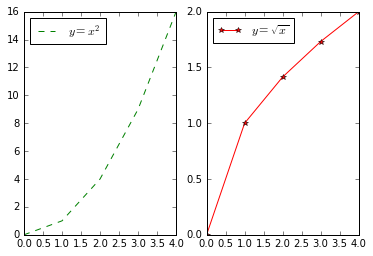

In [487]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(v1 ** 2,'g--', label='$y = x^2$')
plt.legend(loc=0)
plt.subplot(1, 2, 2)
plt.plot(sqrt(v1), 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)
plt.show()

In [479]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [480]:
print(A * 2)

[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]


In [481]:
print(A + 2)

[[ 2  3  4  5  6]
 [12 13 14 15 16]
 [22 23 24 25 26]
 [32 33 34 35 36]
 [42 43 44 45 46]]


### Opérations terme-à-terme sur les *arrays*

Les opérations par défaut sont des opérations **terme-à-terme** :

In [484]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [189]:
A * A # multiplication terme-à-terme

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [190]:
(A + A.T) / 2

array([[ 0,  5, 11, 16, 22],
       [ 5, 11, 16, 22, 27],
       [11, 16, 22, 27, 33],
       [16, 22, 27, 33, 38],
       [22, 27, 33, 38, 44]])

In [191]:
print v1
print v1 * v1

[0 1 2 3 4]
[ 0  1  4  9 16]


En multipliant des *arrays* de tailles compatibles, on obtient des multiplications terme-à-terme par ligne :

In [192]:
A.shape, v1.shape

((5, 5), (5,))

In [193]:
print(A)
print(v1)
print(A * v1)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]
[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]


De façon plus générale, on peut faire des opérations sur des tableaux de différentes tailles. Dans certains cas, NumPy peut transformer les tableaux pour qu'ils aient la même taille, cette conversion s'appelle le **"Broadcasting"**.
<img src="img/numpy_broadcasting.png" width=600>

In [501]:
a = np.arange(4)
b = np.arange(5)
print(a, a.shape)
print(b, b.shape)
a * b

(array([0, 1, 2, 3]), (4,))
(array([0, 1, 2, 3, 4]), (5,))


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [502]:
b = b[:, np.newaxis].T
a = a[:, np.newaxis]
c = a * b
print(a.shape, b.shape, c.shape)

((4, 1), (1, 5), (4, 5))


Il existe une règle pour savoir dans quel cas on peut faire du "broadcasting":
**Dans une opération, la taille des axex des deux tableaux doit être soit la même, soit une des deux doit être 1**.
Dans la figure ci-dessus, cette règle est respectée:
```
a:      4 x 3   
b:      4 x 3
result: 4 x 3

a:      4 x 3
b:          3
result: 4 x 3

a:      4 x 1
b:          3
result: 4 x 3
```

Que donnerait les deux cas suivant?

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  
```

### EXERCICE:

Sans utiliser de boucles (`for/while`) :

 * Créer une matrice (5x6) aléatoire
 * Remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante
 * Remplacer les valeurs négatives par 0 en utilisant un masque binaire


In [246]:
A = random.rand(5,6)
A

array([[ 0.16583517,  0.30937702,  0.85934919,  0.51588752,  0.67572783,
         0.65738351],
       [ 0.73983968,  0.38489411,  0.30006566,  0.57177094,  0.70975145,
         0.47520109],
       [ 0.96060336,  0.24777972,  0.33975698,  0.13164209,  0.92685393,
         0.87461702],
       [ 0.07816414,  0.22311837,  0.93595099,  0.12977276,  0.43283646,
         0.99491922],
       [ 0.36379285,  0.36436729,  0.03035916,  0.90898696,  0.66865286,
         0.56197441]])

In [247]:
A[:, ::2] = A[:, ::2] - 2 * A[:,1::2]

In [248]:
A

array([[-0.45291887,  0.30937702, -0.17242585,  0.51588752, -0.63903918,
         0.65738351],
       [-0.02994854,  0.38489411, -0.84347623,  0.57177094, -0.24065073,
         0.47520109],
       [ 0.46504392,  0.24777972,  0.07647281,  0.13164209, -0.82238011,
         0.87461702],
       [-0.36807259,  0.22311837,  0.67640548,  0.12977276, -1.55700198,
         0.99491922],
       [-0.36494172,  0.36436729, -1.78761476,  0.90898696, -0.45529596,
         0.56197441]])

In [249]:
A[np.where(A < 0)] = 0

In [250]:
A

array([[ 0.        ,  0.30937702,  0.        ,  0.51588752,  0.        ,
         0.65738351],
       [ 0.        ,  0.38489411,  0.        ,  0.57177094,  0.        ,
         0.47520109],
       [ 0.46504392,  0.24777972,  0.07647281,  0.13164209,  0.        ,
         0.87461702],
       [ 0.        ,  0.22311837,  0.67640548,  0.12977276,  0.        ,
         0.99491922],
       [ 0.        ,  0.36436729,  0.        ,  0.90898696,  0.        ,
         0.56197441]])

Créez un tableau qui contient la somme de chaque élément de `x` avec chaque élément de `y`:

In [506]:
x = np.random.rand(3, 5)
y = np.random.randint(10, size=8)

In [507]:
x = x[:, :, np.newaxis]
z = x + y
print(z.shape)

(3, 5, 8)


### Algèbre matricielle

Comment faire des multiplications de matrices ? Deux façons :
 
 * en utilisant les fonctions `dot`; (recommandé)
 * en utiliser le type `matrix`. (à éviter)


In [513]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
v1 = np.arange(5)
print(A.shape, v1.shape)
print(A)
print(v1)
print(type(A), type(v1))

((5, 5), (5,))
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]
(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)


In [514]:
print(np.dot(A, A))  # multiplication matrice
print(A * A)  # multiplication élément par élément

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[   0    1    4    9   16]
 [ 100  121  144  169  196]
 [ 400  441  484  529  576]
 [ 900  961 1024 1089 1156]
 [1600 1681 1764 1849 1936]]


In [515]:
A.dot(v1)

array([ 30, 130, 230, 330, 430])

In [516]:
np.dot(v1, v1)

30

Avec le type `matrix` de Numpy

In [517]:
M = np.matrix(A)
v = np.matrix(v1).T # en faire un vecteur colonne

In [518]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [519]:
# produit scalaire
v.T * v

matrix([[30]])

In [520]:
# avec les objets matrices, c'est les opérations standards sur les matrices qui sont appliquées
v + M * v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Si les dimensions sont incompatibles on provoque des erreurs :

In [523]:
v = np.matrix([1, 2, 3, 4, 5, 6]).T

In [524]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [525]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

Voir également les fonctions : `inner`, `outer`, `cross`, `kron`, `tensordot`. Utiliser par exemple `help(kron)`.

### Transformations d'*arrays* ou de matrices

 * Plus haut `.T` a été utilisé pour transposer l'objet matrice `v`
 * On peut aussi utiliser la fonction `transpose`

**Autres transformations :**


In [526]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [527]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Transposée conjuguée :

In [528]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Parties réelles et imaginaires :

In [529]:
np.real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [530]:
np.imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Argument et module :

In [531]:
np.angle(C + 1) 

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [532]:
np.abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Analyse de données

Numpy propose des fonctions pour calculer certaines statistiques des données stockées dans des *arrays* :

In [556]:
data = arange(20).reshape((5, 4))
data[3, :] = 9
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 9,  9,  9,  9],
       [16, 17, 18, 19]])

#### mean

In [557]:
# np.mean(data)
print(np.mean(data, axis=0))

[ 7.4  8.2  9.   9.8]


In [558]:
# la moyenne de la troisième colonne
np.mean(data[:, 2])

9.0

#### variance et écart type

In [559]:
np.var(data[:, 2]), np.std(data[:, 2])

(28.0, 5.2915026221291814)

#### min et max

In [560]:
data[:, 2].min()

2

In [561]:
data[:, 2].max()

18

In [562]:
data[:, 2].sum()

45

In [563]:
data[:, 2].prod()

19440

#### sum, prod, et trace

In [564]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Somme des éléments

In [565]:
np.sum(d)

45

ou encore :

In [566]:
d.sum()

45

In [567]:
np.prod(d + 1)

3628800

Somme cumulée

In [568]:
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

Produit cumulé

In [569]:
np.cumprod(d + 1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

Trace (équivalent à diag(A).sum())

In [570]:
np.trace(data)

24

### Calculs aves données multi-dimensionnelles

Pour appliquer `min`, `max`, etc., par lignes ou colonnes :

In [159]:
m = random.rand(3,4)
m

array([[ 0.1107825 ,  0.13145548,  0.46566654,  0.2465301 ],
       [ 0.63008442,  0.95829525,  0.90675777,  0.87015917],
       [ 0.7042647 ,  0.68990414,  0.95861916,  0.55068237]])

In [160]:
# max global 
m.max()

0.95861916063175645

In [161]:
# max dans chaque colonne
m.max(axis=0)

array([ 0.7042647 ,  0.95829525,  0.95861916,  0.87015917])

In [162]:
# max dans chaque ligne
m.max(axis=1)

array([ 0.46566654,  0.95829525,  0.95861916])

Plusieurs autres méthodes des classes `array` et `matrix` acceptent l'argument (optional) `axis` keyword argument.

### EXERCICE :

Soustrayez de chaque colonne de `a` sa moyenne, puis faites de même avec les lignes

In [623]:
a = np.random.rand(100, 10)

In [627]:
b = a - np.mean(a, axis=0)
b = b - np.mean(b, axis=1)[:,np.newaxis]

## Copy et "deep copy"

Pour des raisons de performance Python ne copie pas automatiquement les objets (par exemple passage par référence des paramètres de fonctions).

In [576]:
A = np.array([[0,  2], [ 3,  4]])
A

array([[0, 2],
       [3, 4]])

In [577]:
B = A

In [579]:
# changer B affecte A
B[0, 0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [590]:
A

array([[10,  2],
       [ 3,  4]])

In [581]:
B = A
print B is A

True


On peut avoir accès à l'adresse mémoire de l'élément avec:

In [583]:
print(A.__array_interface__['data'][0])
print(B.__array_interface__['data'][0])

72627792
72627792


Pour éviter ce comportement, on peut demander une *copie profonde* (*deep copy*) de `A` dans `B`

In [584]:
# B = np.copy(A)
B = A.copy()

In [585]:
# maintenant en modifiant B, A n'est plus affecté
B[0, 0] = -5
print(B)
print(A)

array([[-5,  2],
       [ 3,  4]])

In [589]:
print(A.__array_interface__['data'][0])
print(B.__array_interface__['data'][0])

72627792
51447280


## Concaténer, répéter des *arrays*

En utilisant les fonctions `repeat`, `tile`, `vstack`, `hstack`, et `concatenate`, on peut créer des vecteurs/matrices plus grandes à partir de vecteurs/matrices plus petites :


#### repeat et tile

In [599]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [600]:
# répéter chaque élément 3 fois
np.repeat(a, 3) # résultat 1-d

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [601]:
# on peut spécifier l'argument axis
np.repeat(a, 3, axis=1)

array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

Pour répéter la matrice, il faut utiliser `tile`

In [602]:
# répéter la matrice 3 fois
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### concatenate

In [603]:
b = np.array([[5, 6]])

In [604]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [605]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

#### hstack et vstack

In [607]:
np.vstack((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [608]:
np.hstack((a, b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Itérer sur les éléments d'un *array*

 * Dans la mesure du possible, il faut éviter l'itération sur les éléments d'un *array* : c'est beaucoup plus lent que les opérations vectorisées
 * Mais il arrive que l'on n'ait pas le choix...

In [610]:
v = np.arange(4)

for element in v:
    print element

0
1
2
3


In [611]:
M = np.array([[1, 2], [3, 4]])

for row in M:
    print "row", row
    
    for element in row:
        print element

row [1 2]
1
2
row [3 4]
3
4


Pour obtenir les indices des éléments sur lesquels on itère (par exemple, pour pouvoir les modifier en même temps) on peut utiliser `enumerate` :

In [612]:
for row_idx, row in enumerate(M):
    print "row_idx", row_idx, "row", row
    
    for col_idx, element in enumerate(row):
        print "col_idx", col_idx, "element", element
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [613]:
# chaque élément de M a maintenant été élevé au carré
M

array([[ 1,  4],
       [ 9, 16]])

## Utilisation d'*arrays* dans des conditions

Losqu'on s'intéresse à des conditions sur tout on une partie d'un *array*, on peut utiliser `any` ou `all` :

In [614]:
M

array([[ 1,  4],
       [ 9, 16]])

In [615]:
if (M > 5).any():
    print("au moins un élément de M est plus grand que 5")
else:
    print("aucun élément de M n'est plus grand que 5")

au moins un élément de M est plus grand que 5


In [616]:
if (M > 5).all():
    print("tous les éléments de M sont plus grands que 5")
else:
    print("tous les éléments de M sont plus petits que 5")

tous les éléments de M sont plus petits que 5


## *Type casting*

On peut créer une vue d'un autre type que l'original pour un *array*

In [617]:
M = array([[-1,2], [0,4]])
M.dtype

dtype('int64')

In [202]:
M2 = M.astype(float)
M2

array([[-1.,  2.],
       [ 0.,  4.]])

In [203]:
M2.dtype

dtype('float64')

In [204]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [False,  True]], dtype=bool)

### EXERCICE :

Dans cette exercice, nous vous proposons d'implémenter une version simplifié du `Midway Equalization Histogram` proposé par Julien Delon. L'idée de cet algorithme est de minimisé l'écart de contraste sur une série d'images.
Dans le cas d'une série d'images possédant les mêmes caractéristiques, l'algorithme peut se résumer de la manière suivante :
- Pour chacune des deux images, classer les niveaux de gris de l'image par ordre croissant.
- Faire la moyenne des pixels de chaque images par rapport à leur position.
- Remplacer la valeur des pixels par celle définie précédement.

Pour cet exercice, nous vous proposons d'utiliser les fonctions `argsort` et `ravel`.

In [35]:
def apply_simple_midway(im_1, im_2):
    midway_1, midway_2 = np.empty(np.size(im_1)), np.empty(np.size(im_2))

    # Compute the midway
    index_im_1 = np.argsort(im_1.ravel())
    im_sort_1 = im_1.ravel()[index_im_1]
    index_im_2 = np.argsort(im_2.ravel())
    im_sort_2 = im_2.ravel()[index_im_2]

    midway = .5 * (im_sort_1 + im_sort_2)

    # Apply the correction
    midway_1[index_im_1] = midway
    midway_2[index_im_2] = midway

    return midway_1.reshape(im_1.shape), midway_2.reshape(im_2.shape)

Nous vous proposons de tester les résultats avec le code suivant qui utilise la librairie `scikit-image` :

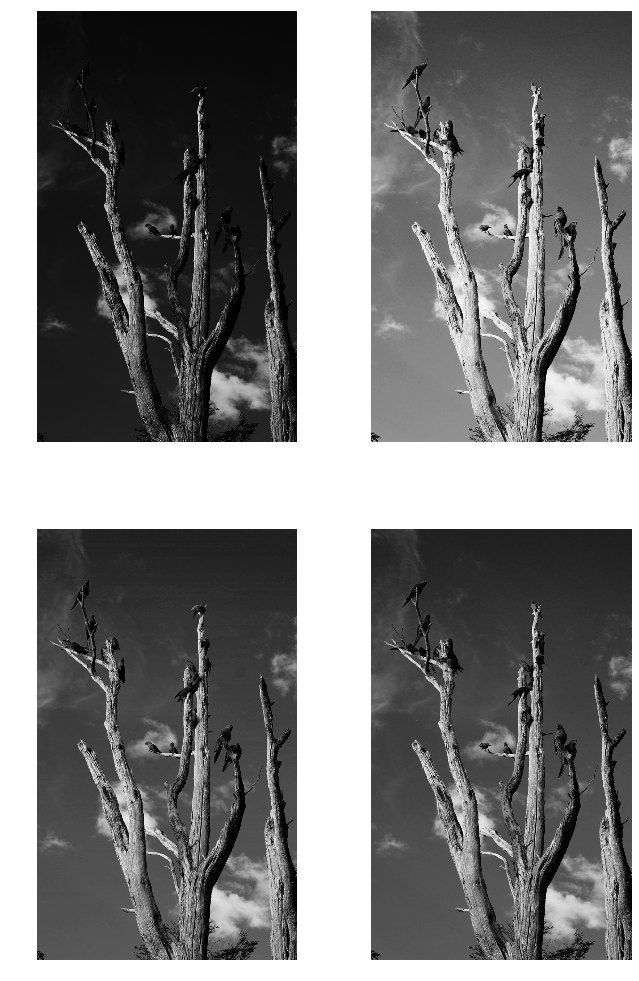

In [53]:
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread

im_1 = img_as_float(imread('exo_numpy/images/parot_1.png'))
im_2 = img_as_float(imread('exo_numpy/images/parot_2.png'))

midway_1, midway_2 = apply_simple_midway(im_1, im_2)

plt.figure(figsize=(11, 17))
plt.subplot(221)
plt.axis('off')
plt.imshow(im_1)

plt.subplot(222)
plt.axis('off')
plt.imshow(im_2)

plt.subplot(223)
plt.axis('off')
plt.imshow(midway_1)

plt.subplot(224)
plt.axis('off')
plt.imshow(midway_2)

plt.show()

## Pour aller plus loin

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - Un guide pour les utilisateurs de MATLAB.